In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import get_seasonality_trend_overview, plot_period_mean
import warnings

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('../originalni_datasetovi/train.csv')
df_test = pd.read_csv('../originalni_datasetovi/test.csv')
df_stores = pd.read_csv('../originalni_datasetovi/stores.csv')
df_oil = pd.read_csv('../originalni_datasetovi/oil.csv')
df_holidays = pd.read_csv('../originalni_datasetovi/holidays_events.csv')
df_transactions = pd.read_csv('../originalni_datasetovi/transactions.csv').sort_values(['store_nbr', 'date'])

In [4]:
df_transactions['date'] = pd.to_datetime(df_transactions.date)
df_train['date'] = pd.to_datetime(df_train.date)

In [10]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [12]:
df_train.describe()

,id,date,store_nbr,sales,onpromotion
count,3.000888e+06,3000888,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2015-04-24 08:27:04.703088384,2.750000e+01,3.577757e+02,2.602770e+00
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,2014-02-26 18:00:00,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2015-04-24 12:00:00,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,2016-06-19 06:00:00,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,1.247170e+05,7.410000e+02
std,8.662819e+05,NaN,1.558579e+01,1.101998e+03,1.221888e+01


In [13]:
print(set(df_train.family.to_list()))
len(set(df_train.family.to_list()))

{'BEAUTY', 'CLEANING', 'PERSONAL CARE', 'SEAFOOD', 'BEVERAGES', 'POULTRY', 'GROCERY II', 'SCHOOL AND OFFICE SUPPLIES', 'LINGERIE', 'AUTOMOTIVE', 'GROCERY I', 'LADIESWEAR', 'HARDWARE', 'LAWN AND GARDEN', 'BOOKS', 'FROZEN FOODS', 'PRODUCE', 'DAIRY', 'EGGS', 'MAGAZINES', 'MEATS', 'BABY CARE', 'PLAYERS AND ELECTRONICS', 'HOME CARE', 'HOME AND KITCHEN I', 'HOME APPLIANCES', 'CELEBRATION', 'DELI', 'PREPARED FOODS', 'HOME AND KITCHEN II', 'LIQUOR,WINE,BEER', 'BREAD/BAKERY', 'PET SUPPLIES'}


33

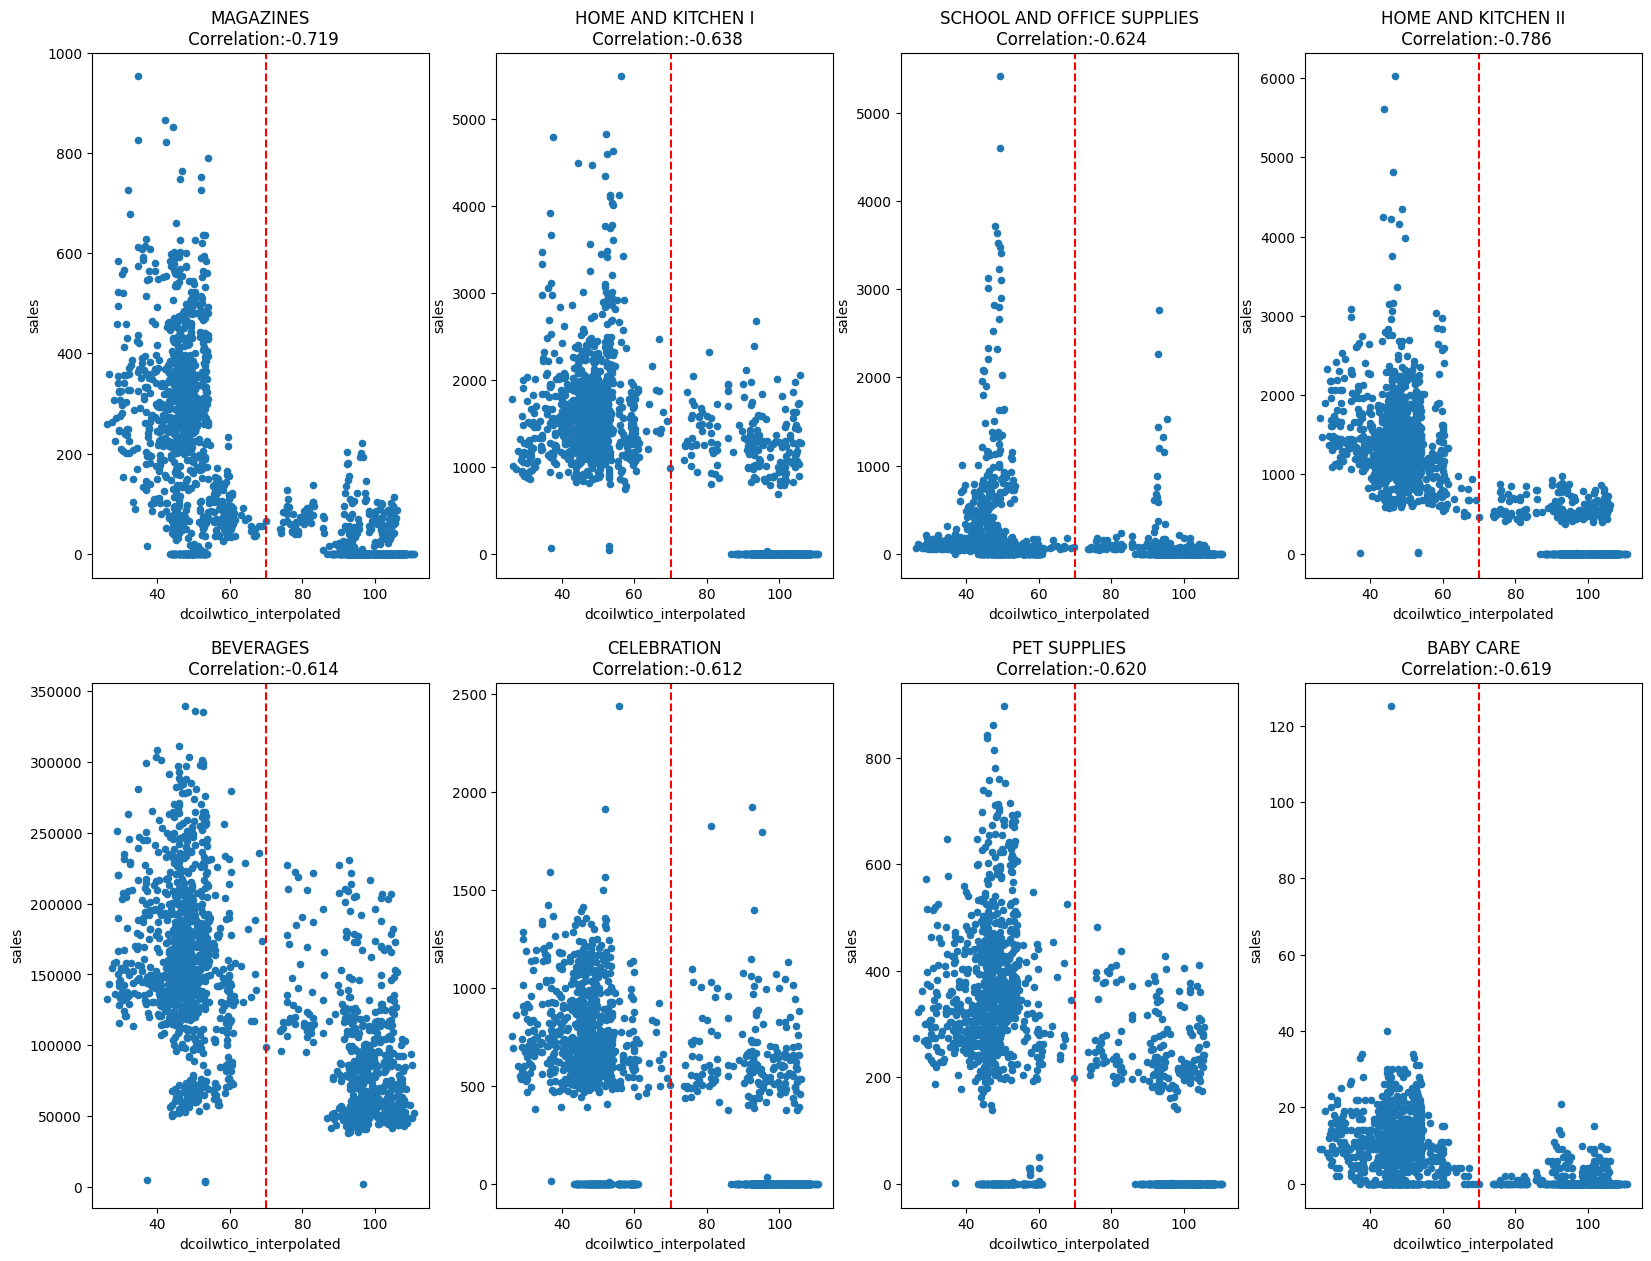

In [17]:
oil = pd.read_csv('../originalni_datasetovi/oil.csv')
oil['date'] = pd.to_datetime(oil.date)

# Resample -> index is now date and if there is entry missing for some date it will be 0 for oil_prices
oil = oil.set_index('date').dcoilwtico.resample('D').sum().reset_index()

# Interpolate
oil['dcoilwtico'] = np.where(oil['dcoilwtico'] == 0, np.nan, oil['dcoilwtico'])
oil['dcoilwtico_interpolated'] = oil.dcoilwtico.interpolate()

# merge train data and oil data
a = pd.merge(df_train.groupby(['date', 'family']).sales.sum().reset_index(), oil.drop('dcoilwtico', axis = 1), how = 'left')
c = a.groupby('family').corr('spearman').reset_index()
c = c[c.level_1 == 'dcoilwtico_interpolated'][['family', 'sales']].sort_values('sales')

# extract only statisticaly significant correlations
df_significant_corelation = c[(c['sales'] >= 0.6) | (c['sales'] <= -0.6)]
df_significant_corelation

# we make 2x4 matrix of plots
fig, axes = plt.subplots(2, 4, figsize=(20, 15))
for i, family in enumerate(df_significant_corelation.family):
    if i < 4:
         a[a.family == family].plot.scatter(x = 'dcoilwtico_interpolated', y = 'sales', ax=axes[0, i-1])
         axes[0, i-1].set_title(family+'\n Correlation:'+str(df_significant_corelation[df_significant_corelation.family == family].sales.iloc[0])[:6], fontsize = 12)
         axes[0, i-1].axvline(x=70, color='r', linestyle='--')
    else:
         a[a.family == family].plot.scatter(x = 'dcoilwtico_interpolated', y = 'sales', ax=axes[1, i-6])
         axes[1, i-6].set_title(family+'\n Correlation:'+str(df_significant_corelation[df_significant_corelation.family == family].sales.iloc[0])[:6], fontsize = 12)
         axes[1, i-6].axvline(x=70, color='r', linestyle='--')

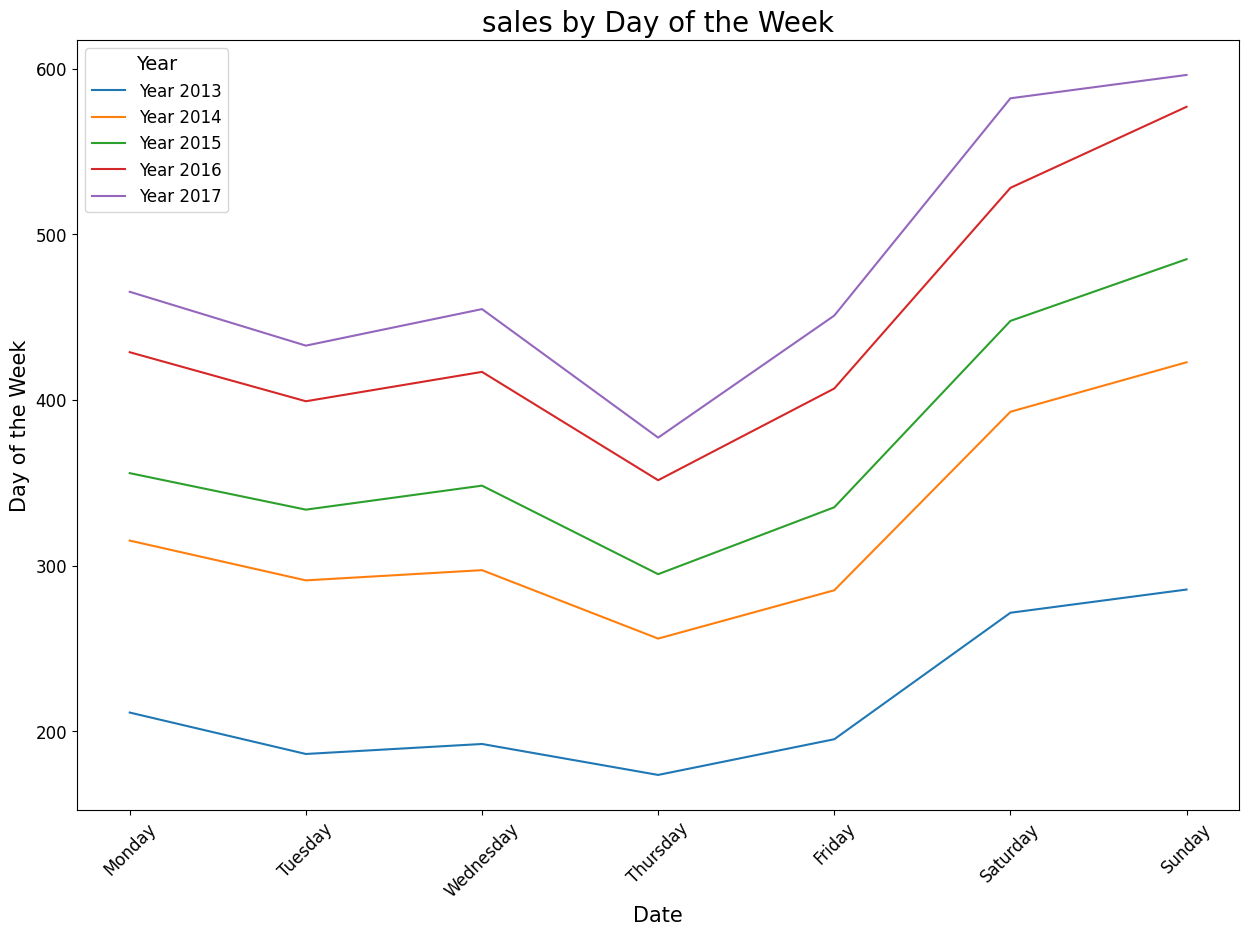

In [18]:
plot_period_mean(df_train, 'sales', period='DW')

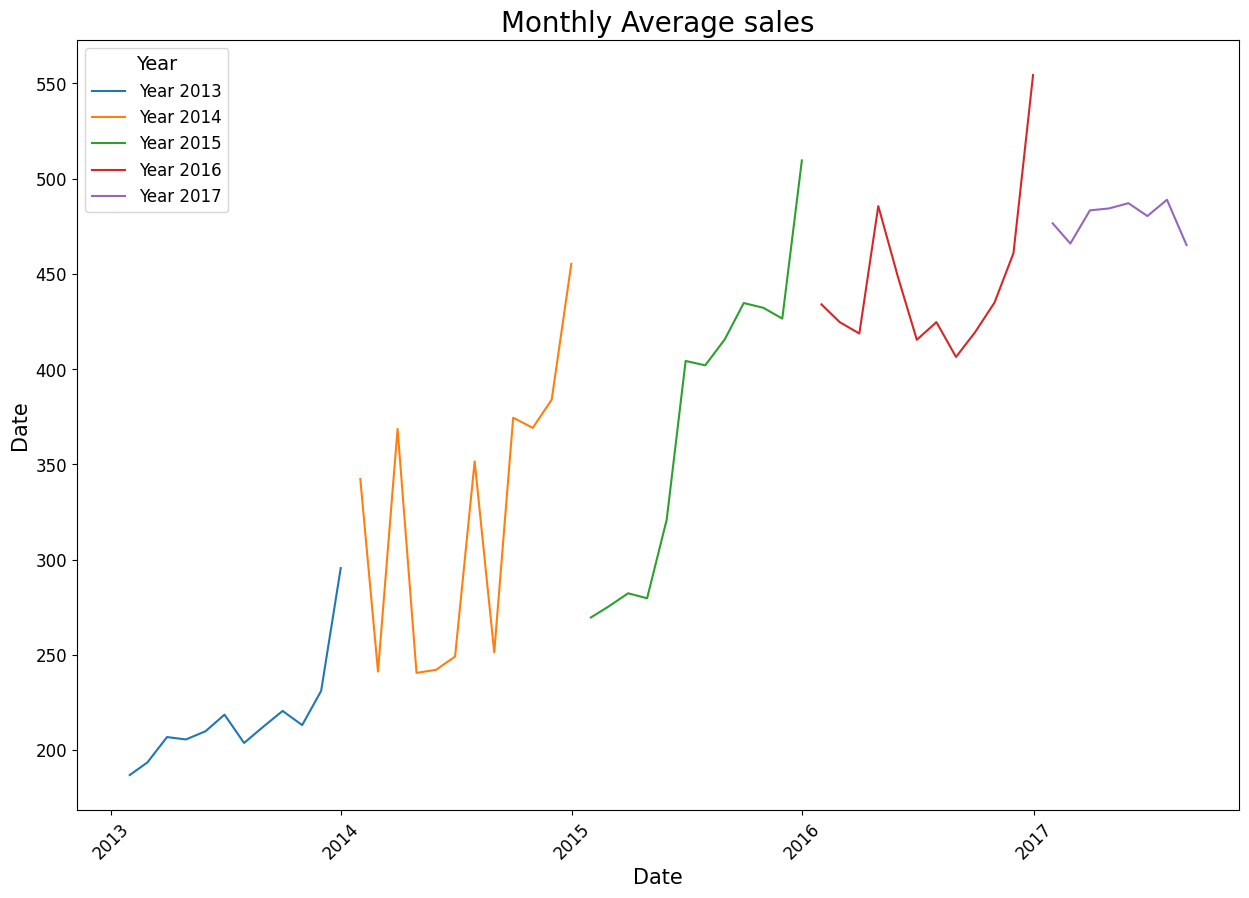

In [19]:
plot_period_mean(df_train, 'sales', period='M')

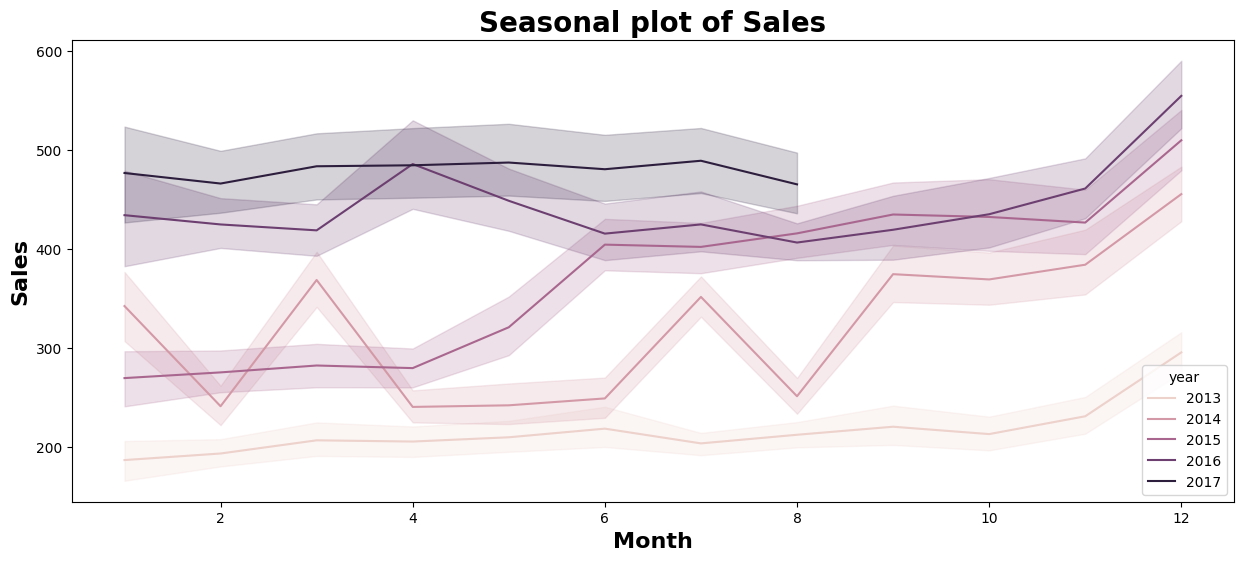

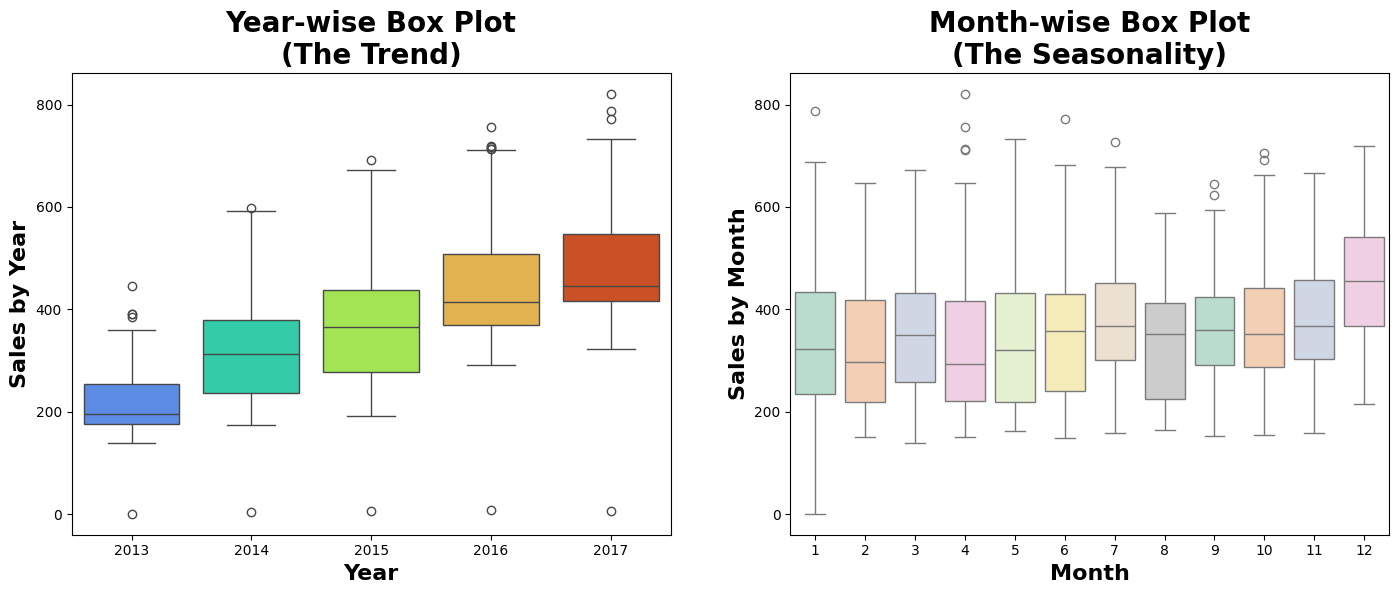

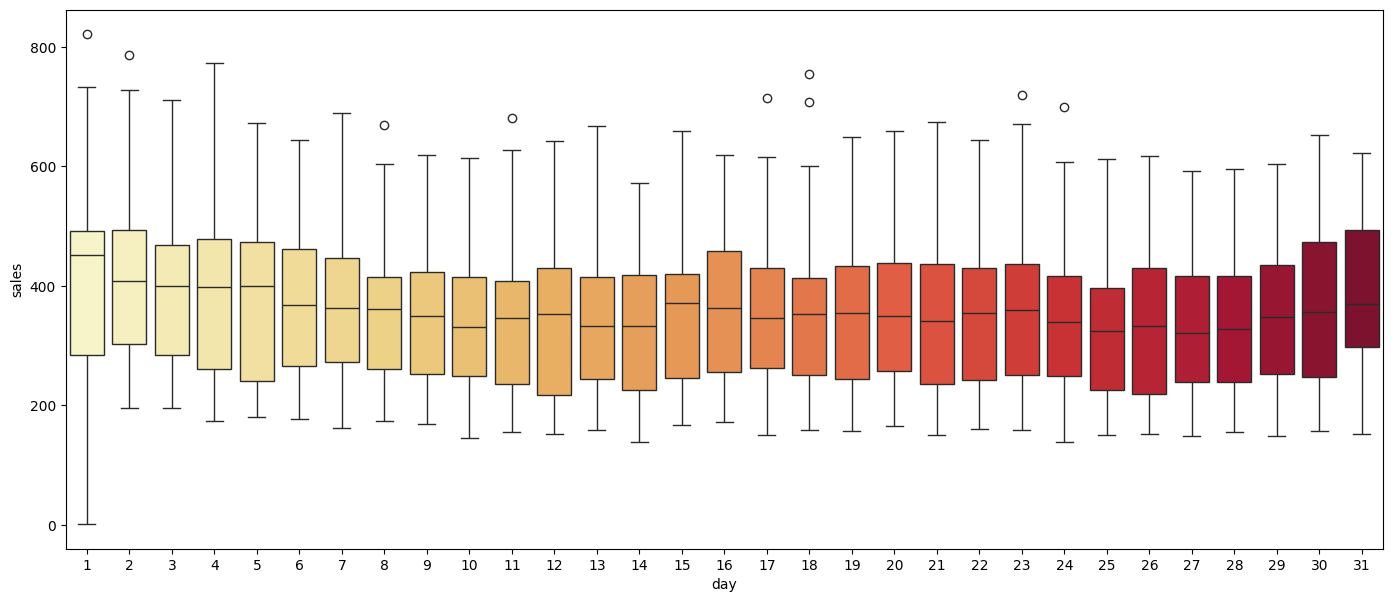

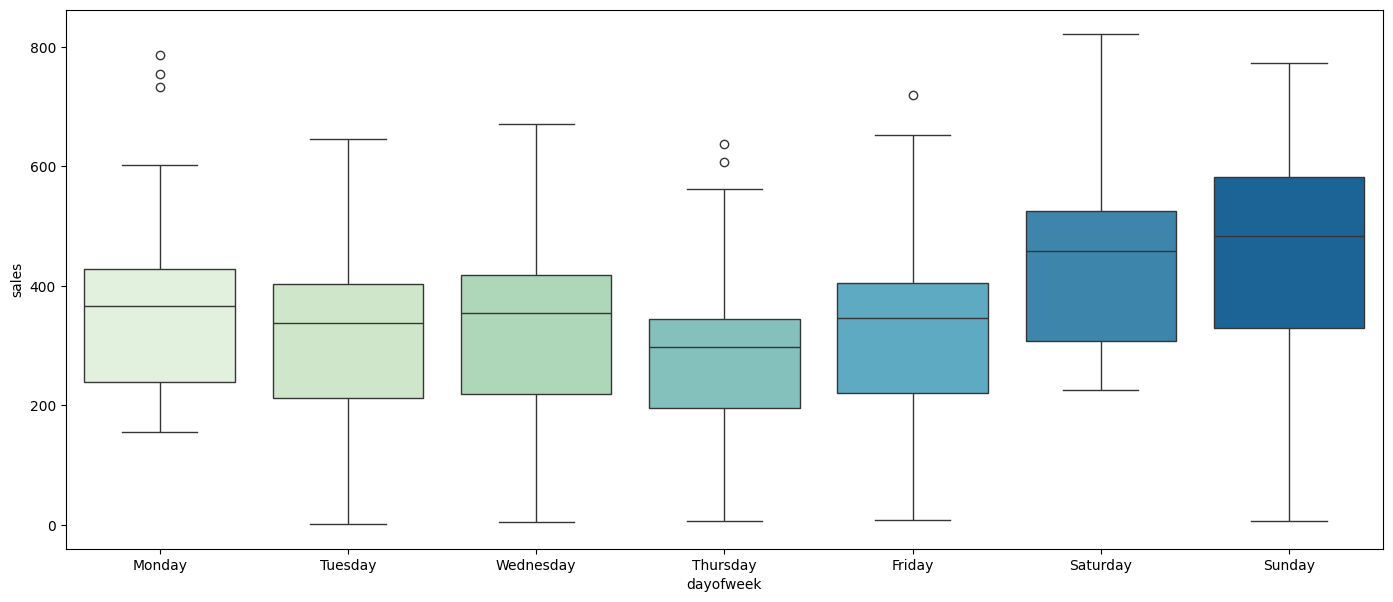

In [20]:
get_seasonality_trend_overview(df_train.drop(columns='family'), 'sales', 'Sales')